Program Assignment 1 Machine Learning

Problem and Task Understanding (30 points): Explain the problem you want to
solve, and be specific about the machine learning task, whether it is a classification
problem or regression problem.

We are given a dataset of student grades originating from different schools. The data collected ranges from the gender and age of the student to their frequency of absences alongside their grades. As most of the data is continuous, we will use regression to solve our problem of _______________________.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline


### Load Dataset

In [2]:
url = "Student Grade - Dataset.csv"
dataset = pd.read_csv(url)
dataset.sample(10)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
212     GP   F   16       U     GT3       A     2     2     other     other   
25      GP   F   16       U     GT3       T     2     2  services  services   
275     GP   F   17       U     LE3       T     2     2  services     other   
165     GP   M   16       U     GT3       T     3     2  services  services   
227     GP   M   17       U     LE3       T     2     3  services  services   
81      GP   M   15       U     GT3       T     2     3     other     other   
116     GP   M   15       U     GT3       T     4     4     other   teacher   
226     GP   F   17       U     GT3       T     3     2     other     other   
246     GP   M   17       U     GT3       T     2     3     other     other   
315     GP   F   19       R     GT3       T     2     3     other     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
212  ...      3        3      4     1     1      4        0  12  13  14  
25   ...      1        2      2     1     3      5       14   6   9   8  
275  ...      4        4      4     2     3      5        6  12  12  12  
165  ...      4        5      2     1     1      2       16  12  11  12  
227  ...      5        3      3     1     3      3        2  12  11  12  
81   ...      5        3      2     1     2      5        4  11  10  11  
116  ...      4        4      3     1     1      2        2  11  13  14  
226  ...      5        3      4     1     3      3       10  16  15  15  
246  ...      5        2      2     1     1      2        4  12  12  13  
315  ...      4        1      2     1     1      3       40  13  11  11  

[10 rows x 33 columns]

### Preprocessing Data

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['school'] = le.fit_transform(dataset['school'].values)
dataset['sex'] = le.fit_transform(dataset['sex'].values)
dataset['address'] = le.fit_transform(dataset['address'].values)
dataset['famsize'] = le.fit_transform(dataset['famsize'].values)
dataset['Pstatus'] = le.fit_transform(dataset['Pstatus'].values)
dataset['Mjob'] = le.fit_transform(dataset['Mjob'].values)
dataset['Fjob'] = le.fit_transform(dataset['Fjob'].values)
dataset['reason'] = le.fit_transform(dataset['reason'].values)
dataset['guardian'] = le.fit_transform(dataset['guardian'].values)
dataset['schoolsup'] = le.fit_transform(dataset['schoolsup'].values)
dataset['famsup'] = le.fit_transform(dataset['famsup'].values)
dataset['paid'] = le.fit_transform(dataset['paid'].values)
dataset['activities'] = le.fit_transform(dataset['activities'].values)
dataset['nursery'] = le.fit_transform(dataset['nursery'].values)
dataset['higher'] = le.fit_transform(dataset['higher'].values)
dataset['internet'] = le.fit_transform(dataset['internet'].values)
dataset['romantic'] = le.fit_transform(dataset['romantic'].values)

dataset.head(n=10)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   
5       0    1   16        1        1        1     4     3     3     2  ...   
6       0    1   16        1        1        1     2     2     2     2  ...   
7       0    0   17        1        0        0     4     4     2     4  ...   
8       0    1   15        1        1        0     3     2     3     2  ...   
9       0    1   15        1        0        1     3     4     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1       5         2  15  14  15  
4       4         3      2     1     2       5         4   6  10  10  
5       5         4      2     1     2       5        10  15  15  15  
6       4         4      4     1     1       3         0  12  12  11  
7       4         1      4     1     1       1         6   6   5   6  
8       4         2      2     1     1       1         0  16  18  19  
9       5         5      1     1     1       5         0  14  15  15  

[10 rows x 33 columns]

### Checking NaN Data

In [24]:
dataset.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Exploratory Data Analysis (Univariate)

In [25]:
# Display the Univariate Data Characteristics 
dataset.describe()

school         sex         age     address     famsize     Pstatus  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.116456    0.473418   16.696203    0.777215    0.288608    0.896203   
std      0.321177    0.499926    1.276043    0.416643    0.453690    0.305384   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    1.000000    0.000000    1.000000   
50%      0.000000    0.000000   17.000000    1.000000    0.000000    1.000000   
75%      0.000000    1.000000   18.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000   22.000000    1.000000    1.000000    1.000000   

             Medu        Fedu        Mjob        Fjob  ...      famrel  \
count  395.000000  395.000000  395.000000  395.000000  ...  395.000000   
mean     2.749367    2.521519    2.169620    2.281013  ...    3.944304   
std      1.094735    1.088201    1.227473    0.863542  ...    0.896659   
min      0.000000    0.000000    0.000000    0.000000  ...    1.000000   
25%      2.000000    2.000000    2.000000    2.000000  ...    4.000000   
50%      3.000000    2.000000    2.000000    2.000000  ...    4.000000   
75%      4.000000    3.000000    3.000000    3.000000  ...    5.000000   
max      4.000000    4.000000    4.000000    4.000000  ...    5.000000   

         freetime       goout        Dalc        Walc      health    absences  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.235443    3.108861    1.481013    2.291139    3.554430    5.708861   
std      0.998862    1.113278    0.890741    1.287897    1.390303    8.003096   
min      1.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
25%      3.000000    2.000000    1.000000    1.000000    3.000000    0.000000   
50%      3.000000    3.000000    1.000000    2.000000    4.000000    4.000000   
75%      4.000000    4.000000    2.000000    3.000000    5.000000    8.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000   75.000000   

               G1          G2          G3  
count  395.000000  395.000000  395.000000  
mean    10.908861   10.713924   10.415190  
std      3.319195    3.761505    4.581443  
min      3.000000    0.000000    0.000000  
25%      8.000000    9.000000    8.000000  
50%     11.000000   11.000000   11.000000  
75%     13.000000   13.000000   14.000000  
max     19.000000   19.000000   20.000000  

[8 rows x 33 columns]

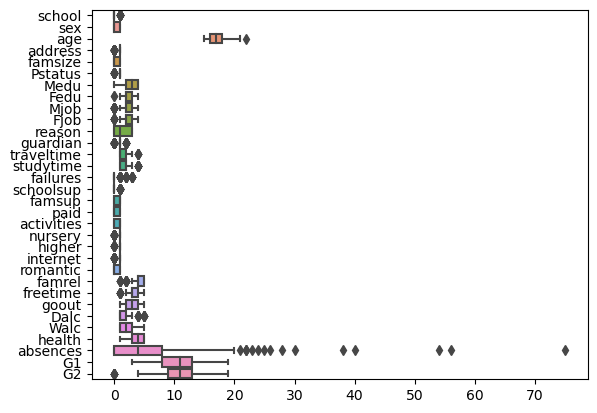

In [53]:
# Display Graphical Univariate EDA using box plot to analyze data distribution
sns.boxplot(data=dataset.drop(columns=['G3']), orient='h')
plt.show()

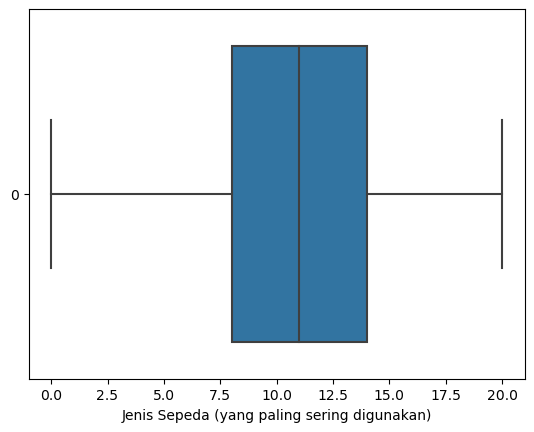

In [29]:
# Display a separate boxplot for 'G3' 
sns.boxplot(data=dataset["G3"],orient="h")
plt.xlabel('Jenis Sepeda (yang paling sering digunakan)')
plt.show()

### Exploratory Data Analysis (Multivariate)

In [32]:
# Display the Multivariate EDA using pair plot
sns.pairplot(data=dataset, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.show()

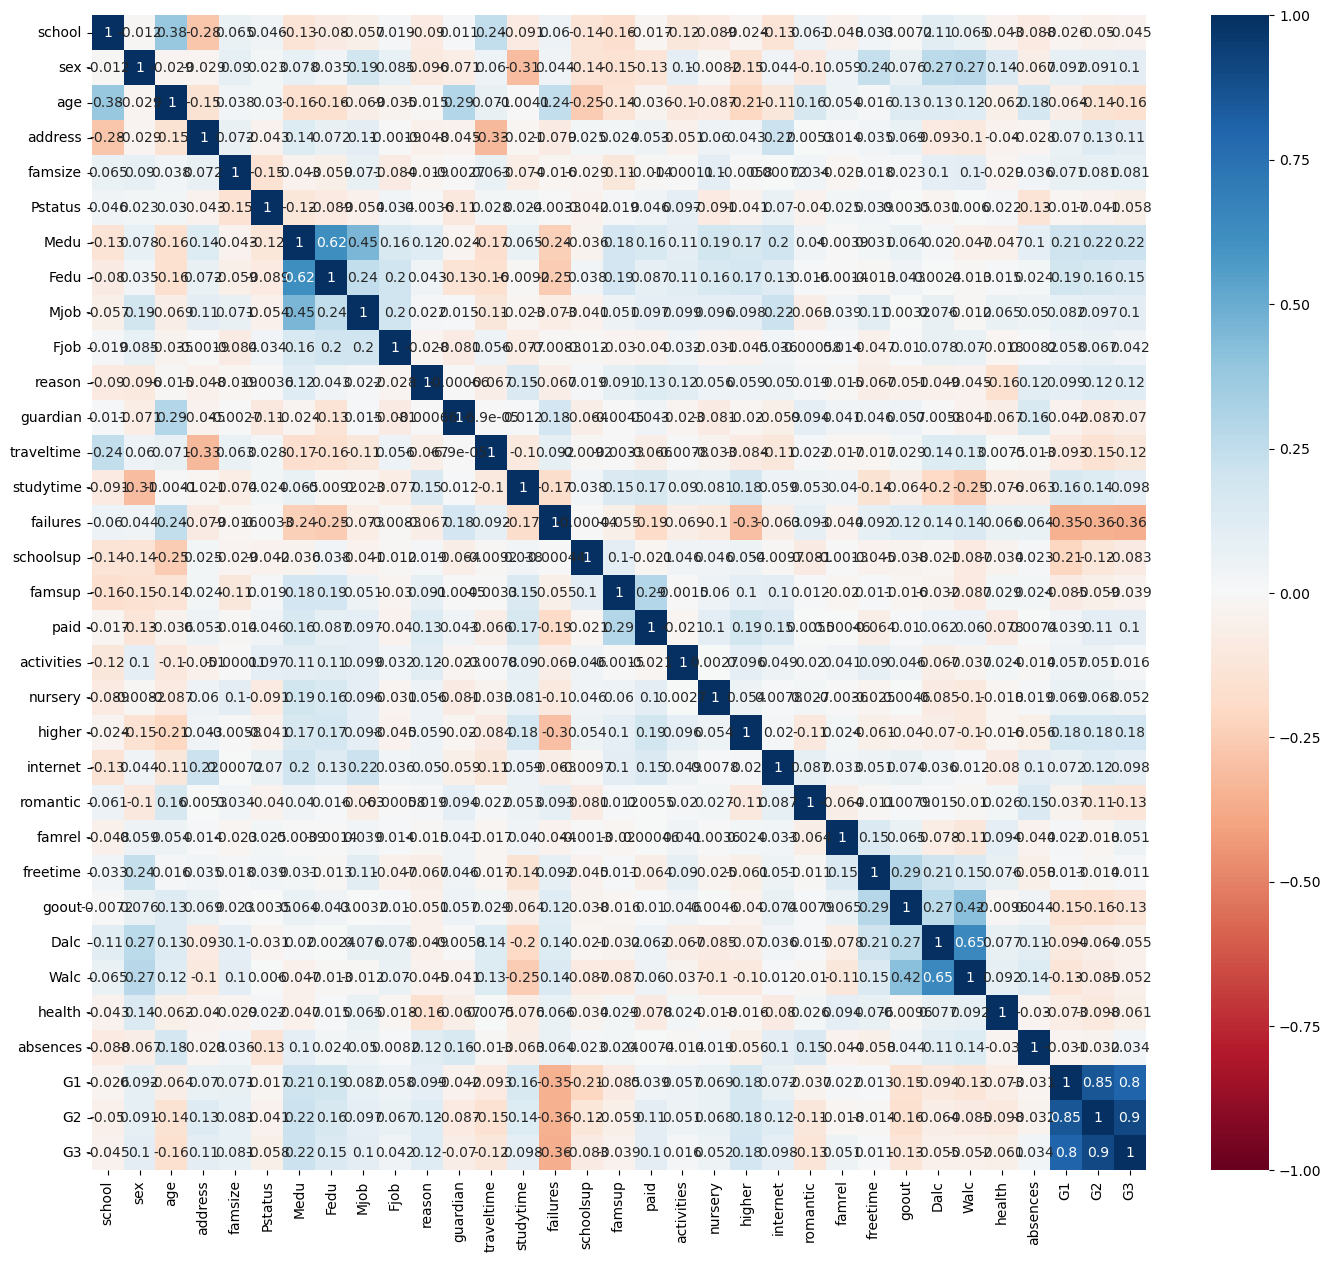

In [42]:
# Display the correlation strength and direction using heatmap
plt.subplots(figsize=(17,15))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

### Deciding The Independent And Dependent Variable

In [31]:
# Asumsi X adalah kolom yang diletakkan dari kolom kiri, kecuali paling kanan
X = dataset.iloc[:, :-1].values

# Asumsi X adalah dependent variable paling kanan
y = dataset.iloc[:, -1].values

### Split The Dataset To Training Data dan Test Data
Train test split is a model validation process that allows you to simulate how your model would perform with new data.

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Create The Regression Model Based On The Training Data

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


print("Intercept: {:0.4f}".format(regressor.intercept_))
print("Coefficient b1: {:0.4f}".format(regressor.coef_[0]))
print("Coefficient b2: {:0.4f}".format(regressor.coef_[1]))
print("Coefficient b3: {:0.4f}".format(regressor.coef_[2]))
print("Coefficient b4: {:0.4f}".format(regressor.coef_[3]))
print("Coefficient b5: {:0.4f}".format(regressor.coef_[4]))
print("Coefficient b6: {:0.4f}".format(regressor.coef_[5]))
print("Coefficient b7: {:0.4f}".format(regressor.coef_[6]))
print("Coefficient b8: {:0.4f}".format(regressor.coef_[7]))
print("Coefficient b9: {:0.4f}".format(regressor.coef_[8]))
print("Coefficient b10: {:0.4f}".format(regressor.coef_[9]))
print("Coefficient b11: {:0.4f}".format(regressor.coef_[10]))
print("Coefficient b12: {:0.4f}".format(regressor.coef_[11]))
print("Coefficient b13: {:0.4f}".format(regressor.coef_[12]))
print("Coefficient b14: {:0.4f}".format(regressor.coef_[13]))
print("Coefficient b15: {:0.4f}".format(regressor.coef_[14]))
print("Coefficient b16: {:0.4f}".format(regressor.coef_[15]))
print("Coefficient b17: {:0.4f}".format(regressor.coef_[16]))
print("Coefficient b18: {:0.4f}".format(regressor.coef_[17]))
print("Coefficient b19: {:0.4f}".format(regressor.coef_[18]))
print("Coefficient b20: {:0.4f}".format(regressor.coef_[19]))
print("Coefficient b21: {:0.4f}".format(regressor.coef_[20]))
print("Coefficient b22: {:0.4f}".format(regressor.coef_[21]))
print("Coefficient b23: {:0.4f}".format(regressor.coef_[22]))
print("Coefficient b24: {:0.4f}".format(regressor.coef_[23]))
print("Coefficient b25: {:0.4f}".format(regressor.coef_[24]))
print("Coefficient b26: {:0.4f}".format(regressor.coef_[25]))
print("Coefficient b27: {:0.4f}".format(regressor.coef_[26]))
print("Coefficient b28: {:0.4f}".format(regressor.coef_[27]))
print("Coefficient b29: {:0.4f}".format(regressor.coef_[28]))
print("Coefficient b30: {:0.4f}".format(regressor.coef_[29]))
print("Coefficient b31: {:0.4f}".format(regressor.coef_[30]))
print("Coefficient b32: {:0.4f}".format(regressor.coef_[31]))

print('\nRegression Equation: y= {:0.4f} X1 + {:0.4f} X2 + {:0.4f} X3 + {:0.4f} X4 + {:0.4f} X5 + {:0.4f} X6 + {:0.4f} X7 + {:0.4f} X8 + {:0.4f} X9 + {:0.4f} X10 + {:0.4f} X11 + {:0.4f} X12 + {:0.4f} X13 + {:0.4f} X14 + {:0.4f} X15 + {:0.4f} X16 + {:0.4f} X17 + {:0.4f} X18 + {:0.4f} X19 + {:0.4f} X20 + {:0.4f} X21 + {:0.4f} X22 + {:0.4f} X23 + {:0.4f} X24 + {:0.4f} X25 + {:0.4f} X26 + {:0.4f} X27 + {:0.4f} X28 + {:0.4f} X29 + {:0.4f} X30 + {:0.4f} X31 + {:0.4f} X32'
      .format(regressor.coef_[0], regressor.coef_[1], regressor.coef_[2], regressor.coef_[3], regressor.coef_[4], regressor.coef_[5], regressor.coef_[6], regressor.coef_[7], regressor.coef_[8], regressor.coef_[9], regressor.coef_[10], regressor.coef_[11], regressor.coef_[12], regressor.coef_[13], regressor.coef_[14], regressor.coef_[15], regressor.coef_[16], regressor.coef_[17], regressor.coef_[18], regressor.coef_[19], regressor.coef_[20], regressor.coef_[21], regressor.coef_[22], regressor.coef_[23], regressor.coef_[24], regressor.coef_[25], regressor.coef_[26], regressor.coef_[27], regressor.coef_[28], regressor.coef_[29], regressor.coef_[30], regressor.coef_[31], regressor.intercept_))

# Find the Coefficient of Determination
r_square = regressor.score(X_train, y_train)
print('\nThe Coefficient of Determination: {:0.4f}'.format(r_square))

Intercept: 1.2892
Coefficient b1: 0.6035
Coefficient b2: 0.2073
Coefficient b3: -0.2579
Coefficient b4: 0.0323
Coefficient b5: 0.1887
Coefficient b6: -0.1166
Coefficient b7: 0.1812
Coefficient b8: -0.2107
Coefficient b9: -0.0161
Coefficient b10: 0.0531
Coefficient b11: -0.0191
Coefficient b12: -0.0139
Coefficient b13: 0.0359
Coefficient b14: 0.0315
Coefficient b15: -0.2063
Coefficient b16: 0.6056
Coefficient b17: 0.0948
Coefficient b18: 0.2121
Coefficient b19: -0.3533
Coefficient b20: -0.3054
Coefficient b21: 0.1900
Coefficient b22: -0.2743
Coefficient b23: -0.2804
Coefficient b24: 0.2427
Coefficient b25: -0.0246
Coefficient b26: 0.0043
Coefficient b27: -0.1879
Coefficient b28: 0.1328
Coefficient b29: 0.1163
Coefficient b30: 0.0656
Coefficient b31: 0.1392
Coefficient b32: 0.9739

Regression Equation: y= 0.6035 X1 + 0.2073 X2 + -0.2579 X3 + 0.0323 X4 + 0.1887 X5 + -0.1166 X6 + 0.1812 X7 + -0.2107 X8 + -0.0161 X9 + 0.0531 X10 + -0.0191 X11 + -0.0139 X12 + 0.0359 X13 + 0.0315 X14 + -0.206

### Test The Predicted Value Using Test Data

In [44]:
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

y_test     y_pred
0      14  14.243208
1      10  10.675614
2       9   9.151399
3      15  15.251887
4      16  16.491889

### Evaluating the Model Fit using RMSE

In [47]:
from sklearn.metrics import mean_squared_error

# Berapakah rata-rata error yang terjadi antara y_test dan y_pred?
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

Root Mean Squared Error (RMSE): 2.3760


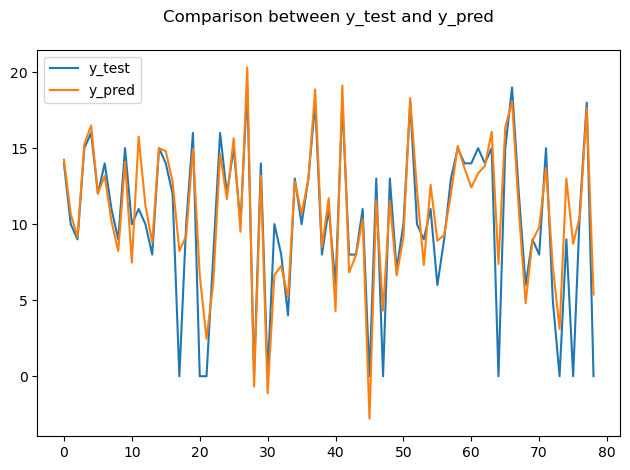

In [48]:
# Visualize the comparison between y_test and y_pred to depict the error margin
evaluate.plot(kind='line')
plt.title('Comparison between y_test and y_pred', pad=20)
plt.tight_layout()
plt.show()